# **WMM 2025L - Laboratorium 1. Analiza częstotliwościowa sygnałów czasu dyskretnego**
## **Maciej Bogusławski (331362), Hubert Kaczyński (331386)**

Niniejszy notatnik stanowi sprawozdanie z laboratorium nr 1 z przedmiotu WMM.



## **Zadanie 1**
Liczba próbek (w jednym okresie) sygnału rzeczywistego $ 𝑠(𝑡) = 𝑐𝑜𝑠(2𝜋𝑡) $ wynosi 𝑁, gdzie N jest potęgą 2.

a) Przyjmując N = 8 wykreślić przebieg sygnału spróbkowanego, widmo amplitudowe i fazowe oraz zweryfikować eksperymentalnie słuszność twierdzenia Parsevala.

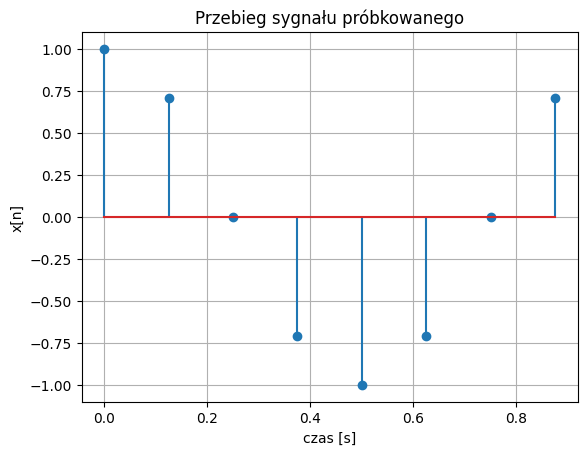

In [117]:
import numpy as np
import matplotlib.pyplot as plt

N = 8 # liczba próbek
n = np.arange(0, N) # indeksy próbek
t = n / N # czas próbkowania
x = np.cos(2 * np.pi * t) # sygnał próbkowany

plt.stem(t, x)
plt.title("Przebieg sygnału próbkowanego")
plt.xlabel("czas [s]")
plt.ylabel("x[n]")
plt.grid(True)

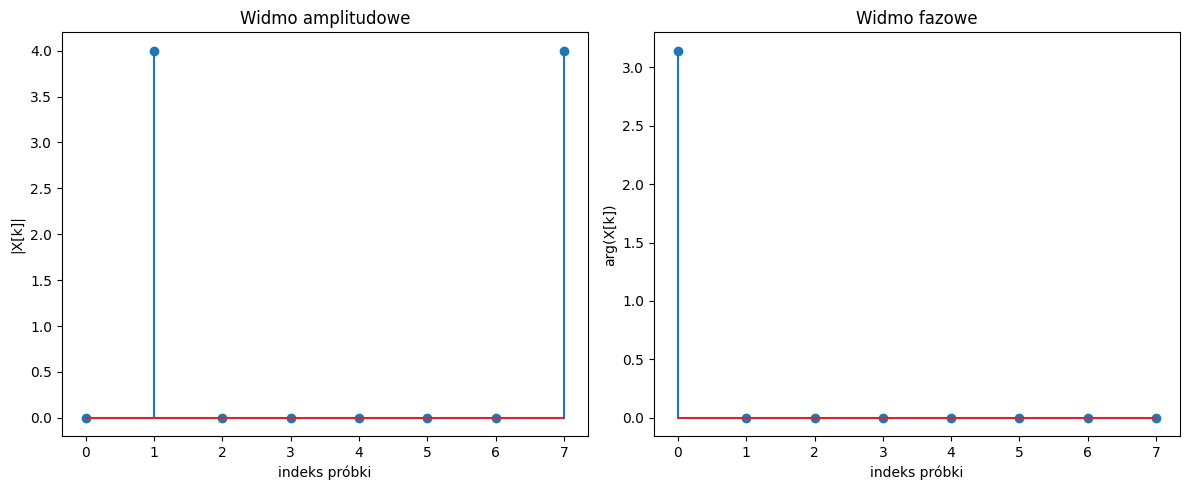

In [118]:
X = np.fft.fft(x) # dyskretna transformata Fouriera
epsilon = 1e-10

# usuwanie błędów numerycznych jeżeli część urojona jest bliska 0
X.imag[np.abs(X.imag) < epsilon] = 0

X_mag = np.abs(X) # widmo amplitudowe
X_phase = np.angle(X) # widmo fazowe

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.stem(n, X_mag)
plt.title("Widmo amplitudowe")
plt.xlabel("indeks próbki")
plt.ylabel("|X[k]|")

plt.subplot(122)
plt.stem(n, X_phase)
plt.title("Widmo fazowe")
plt.xlabel("indeks próbki")
plt.ylabel("arg(X[k])")

plt.tight_layout()
plt.show()

In [119]:
parseval_left = np.sum(np.abs(x) ** 2)
parseval_right = np.sum(np.abs(X) ** 2) / N

print("Weryfikacja twierdzenia Parsevala:")
print(f"Parseval dla sygnału: {parseval_left}")
print(f"Parseval dla widma: {parseval_right}")

Weryfikacja twierdzenia Parsevala:
Parseval dla sygnału: 4.0
Parseval dla widma: 4.0


b) Wykreślić wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą algorytmu FFT w funkcji liczby próbek $ 𝑁 = 2^l, 𝑙 ∈ ℕ $. Skomentować kształt otrzymanego wykresu odnosząc się do teoretycznej złożoności obliczeniowej algorytmu FFT.

Czas wyznaczania widma sygnału w zależności od liczby próbek:


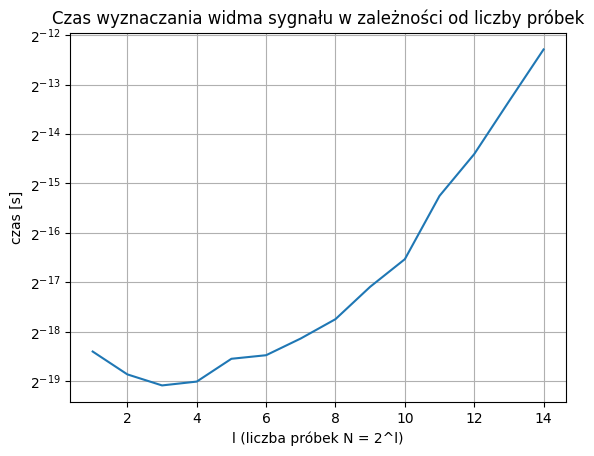

In [ ]:
import time

def fft_time(l):
    N = 2 ** l
    n = np.arange(0, N)
    t = n / N
    x = np.cos(2 * np.pi * t)
    num_iters = 10000
    
    start = time.time()

    for _ in range(num_iters):
        np.fft.fft(x)
    
    end = time.time()

    return (end - start) / num_iters

print("Czas wyznaczania widma sygnału w zależności od liczby próbek:")
times = [fft_time(l) for l in range(1, 15)]
plt.plot(range(1, 15), times)

plt.title("Czas wyznaczania widma sygnału w zależności od liczby próbek")
plt.xlabel("l (liczba próbek N = 2^l)")
plt.ylabel("czas [s]")
plt.yscale("log", base=2)
plt.grid(True)
plt.show()

## **Zadanie 2**
Zbadać wpływ przesunięcia w czasie na postać widma amplitudowego i widma fazowego dyskretnego
sygnału harmonicznego 𝑠[𝑛] = 𝐴 𝑐𝑜𝑠 (2𝜋 𝑛/𝑁) o amplitudzie 𝐴 = 3 i okresie podstawowym 𝑁 = 76.

W tym celu dla każdej wartości 𝑛0 ∈ {0, 𝑁/4, 𝑁/2, 3𝑁/4} wykreślić widmo amplitudowe i fazowe przesuniętego sygnału 𝑠[𝑛 − 𝑛0]. Skomentować otrzymane wyniki.


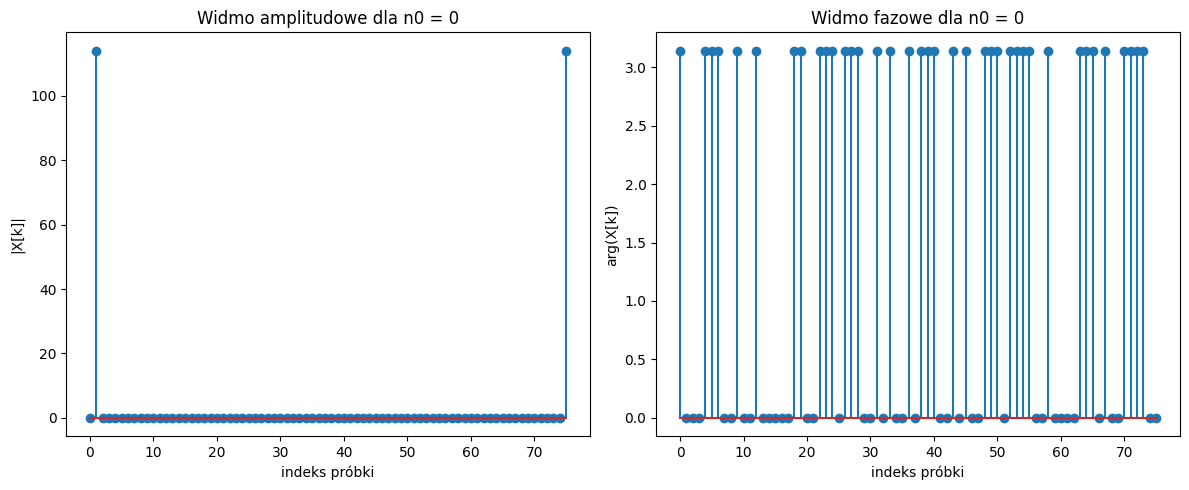

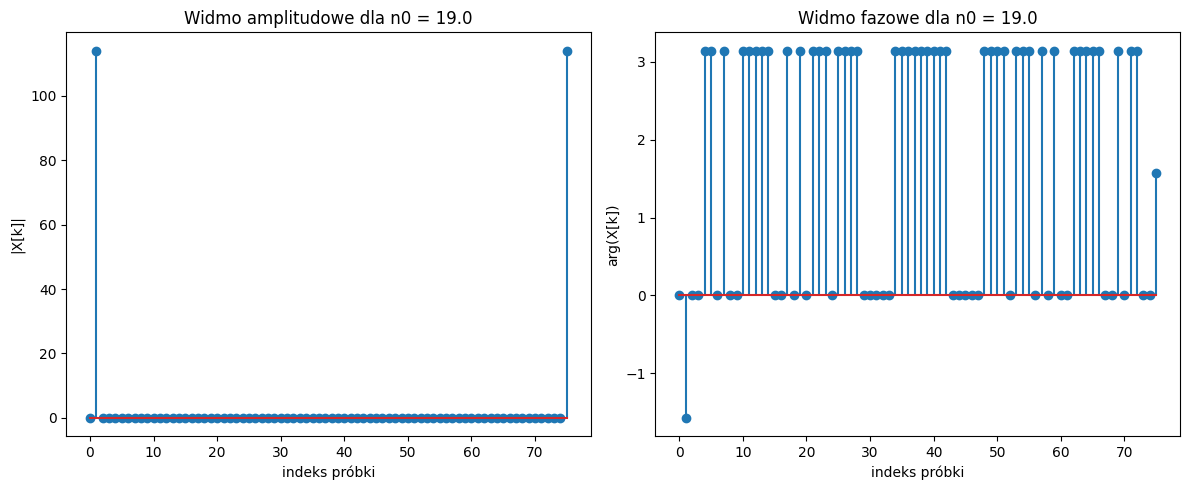

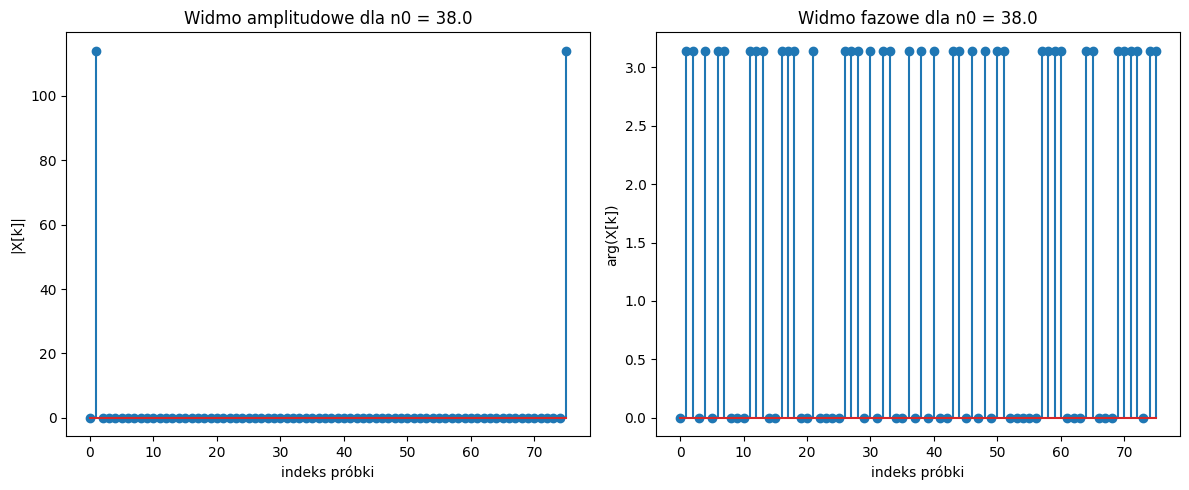

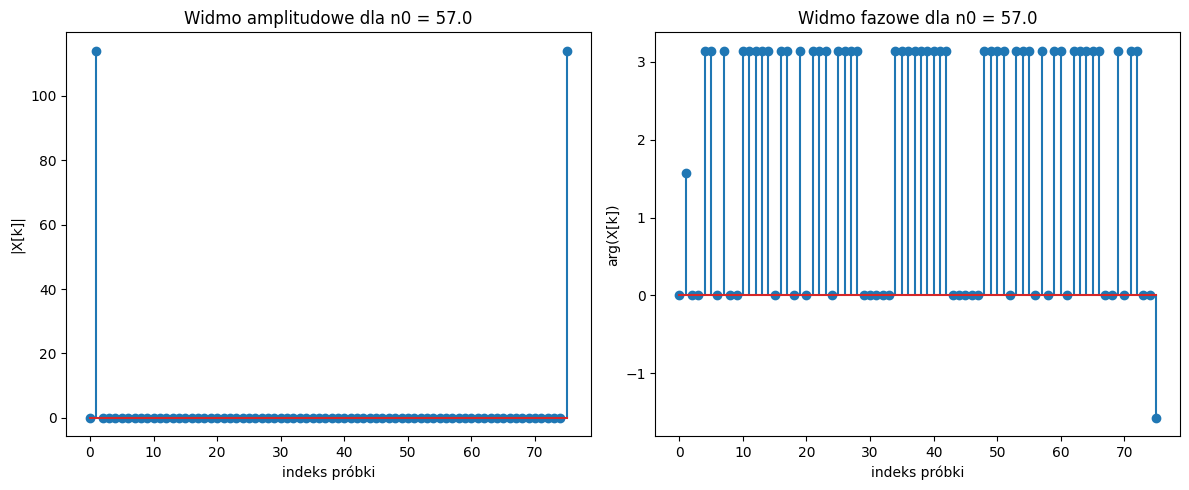

In [124]:
A = 3
N = 76
epsilon = 1e-10
n0_values = [0, N / 4, N / 2, 3 * N / 4]
n = np.arange(0, N)

def s(n, n0):
    return A * np.cos(2 * np.pi * (n - n0) / N)

for n0 in n0_values:
    x = s(n, n0)
    X = np.fft.fft(x)

    X.imag[np.abs(X.imag) < epsilon] = 0
    
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.stem(n, np.abs(X))
    plt.title(f"Widmo amplitudowe dla n0 = {n0}")
    plt.xlabel("indeks próbki")
    plt.ylabel("|X[k]|")
    
    plt.subplot(122)
    plt.stem(n, np.angle(X))
    plt.title(f"Widmo fazowe dla n0 = {n0}")
    plt.xlabel("indeks próbki")
    plt.ylabel("arg(X[k])")
    
    plt.tight_layout()
    plt.show()

Komentarz wyników:

Jak widać na wygenerowanych wykresach, widmo amplitudowe pozostaje niezmienne dla różnych przesunięć.
Zmianie w zależności od przesunięcia ulega natomiast widmo fazowe.

Takie obserwacje zgadzają się z właściwościami transformaty Fouriera dotyczącymi przesunięcia czasowego.